In [37]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [38]:
basedir = '/Users/bono/demo_projects/weather_stocks/'
# file = basedir+'data/df_clean.pkl'
file = basedir+'data/df_all.pkl'
infile = open(file,'rb')
df_all = pickle.load(infile)
infile.close()

In [42]:
df_all.shape

(11413, 35)

# Write a function that models change in stock as a function recent weather flags

In [49]:
def measure_slope(df,start_year,end_year,n_pts=8):
    
    start_day = str(start_year)+"-01-01"
    end_day = str(end_year)+"-12-31"
    
    mask = (df.index > start_day) & (df.index <= end_day)
    sub_df = df[mask]
    
    
    good_means = np.zeros(n_pts)
    good_errs = np.zeros(n_pts)
    bad_means = np.zeros(n_pts)
    bad_errs = np.zeros(n_pts)
    days = np.zeros(n_pts)
    for i in range(n_pts):
        days[i] = i
        #mean for number of good days
        df = sub_df[df_all['n_good'] == i]
        good_means[i] = df['PercentChange'].mean()
        good_errs[i] = df['PercentChange'].sem()

        #mean for number of bad days
        df = sub_df[df_all['n_bad'] == i]
        bad_means[i] = df['PercentChange'].mean()
        bad_errs[i] = df['PercentChange'].sem()

#     plain plot
    plt.figure(figsize=(10, 6)) 
    plt.grid()
    fig = plt.errorbar(days, good_means, yerr=good_errs, label='good weather streaks',fmt='o')
    fig = plt.errorbar(days, bad_means, yerr=bad_errs, label='bad weather streaks',fmt='o')
    plt.ylabel('avg daily percent change in price', fontsize=18)
    plt.xlabel('number of days in streak', fontsize=16)
    plt.legend()
    
    #plot with fit
    xp = np.linspace(0, n_pts - 1, 100)
    z = np.polyfit(days, good_means, deg=1, w=1.0/good_errs**2)
    good_p = np.poly1d(z)
    z = np.polyfit(days, bad_means, deg=1,w=1.0/bad_errs**2)
    bad_p = np.poly1d(z)
    plt.figure(figsize=(10, 6)) 
    plt.grid()
    fig = plt.errorbar(days, good_means, yerr=good_errs, label='good weather streaks',color='C0',ls='none',fmt='o')
    fig = plt.errorbar(days, bad_means, yerr=bad_errs, label='bad weather streaks',color='C1',ls='none',fmt='o')
    fig = plt.plot(xp, good_p(xp), '--', label='good day fit',color='C0')
    fig = plt.plot(xp, bad_p(xp), '--', label='bad day fit',color='C1')
    plt.ylabel('avg daily change in price', fontsize=18)
    plt.xlabel('number of days in streak', fontsize=16)
    plt.legend()
    
    
    

# Look at all the data together

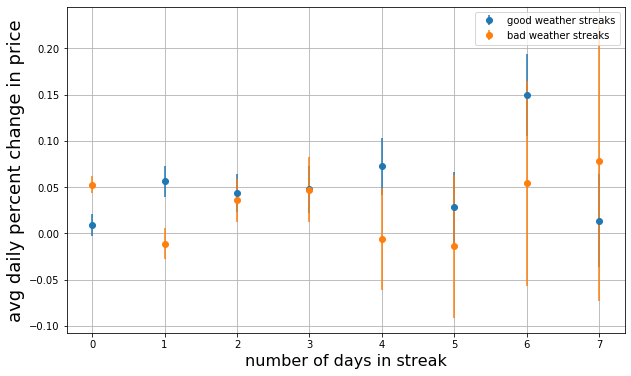

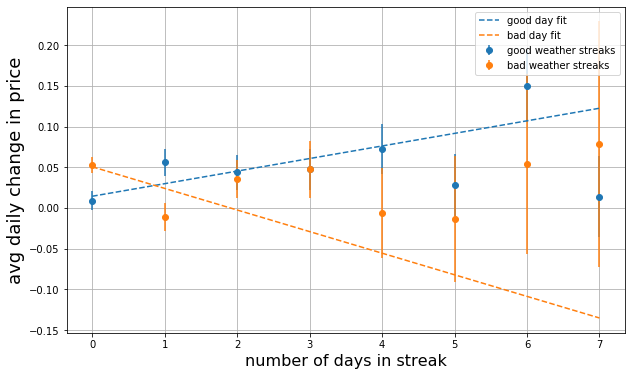

In [50]:
measure_slope(df_all,1950,2020)

# Look at the data, seperated by decade

1950 1959
1960 1969
1970 1979
1980 1989


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1990 1999
2000 2009
2010 2019


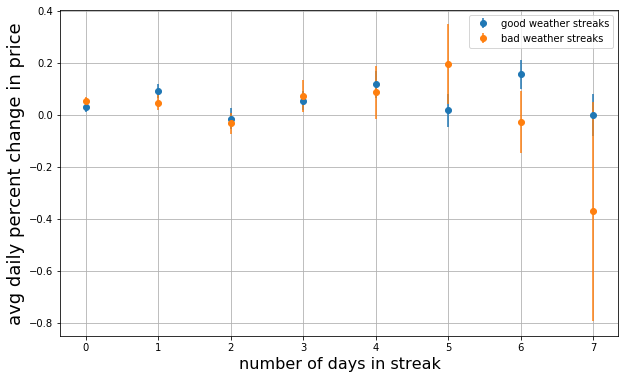

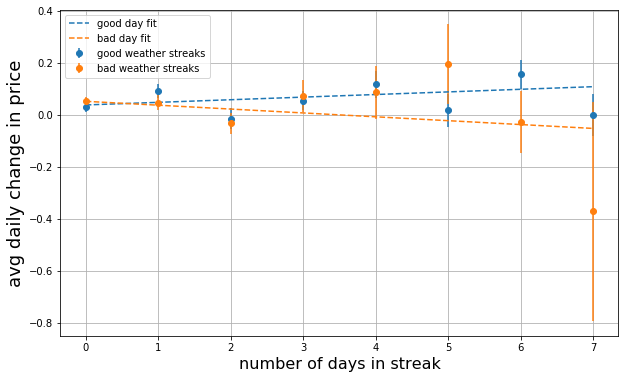

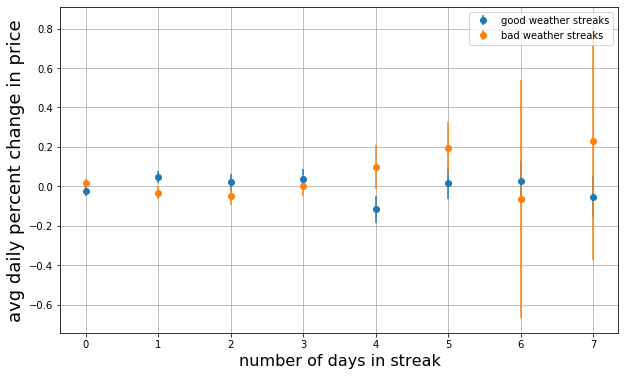

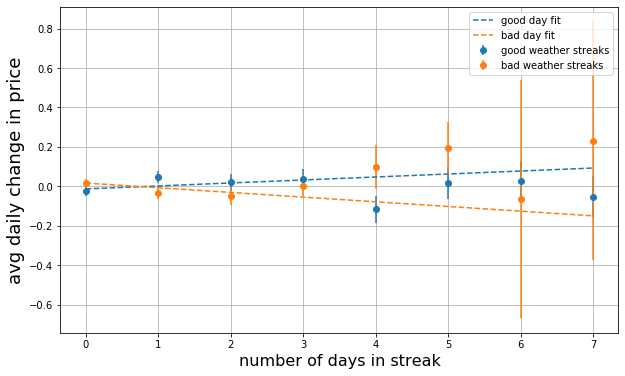

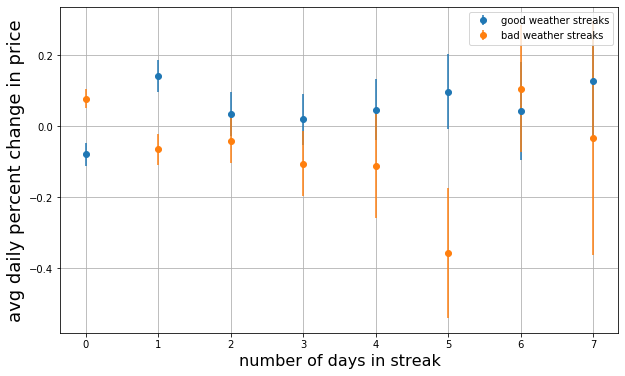

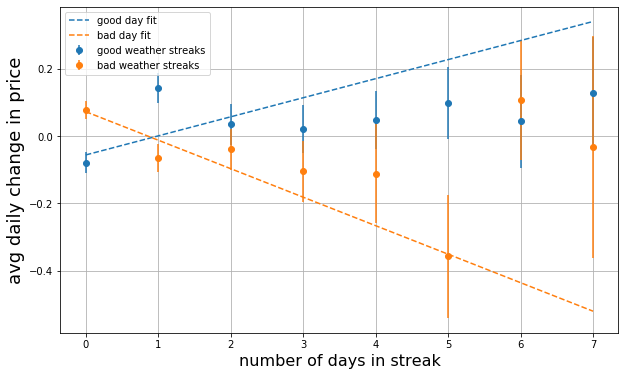

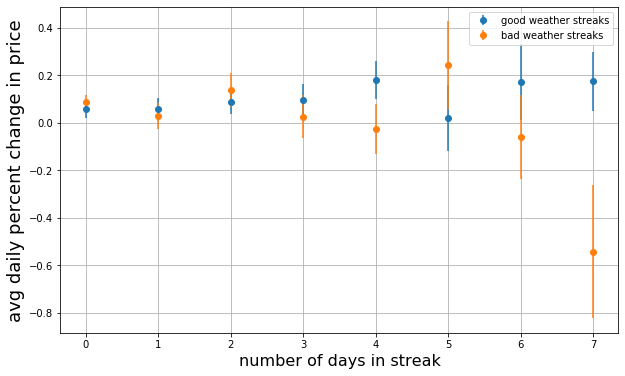

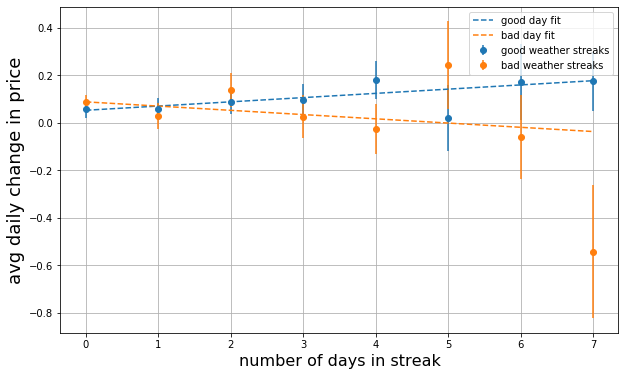

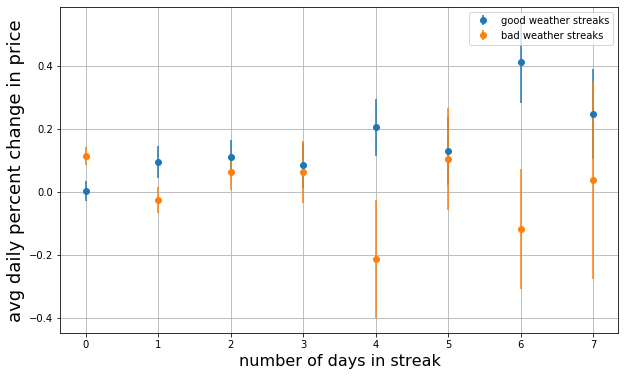

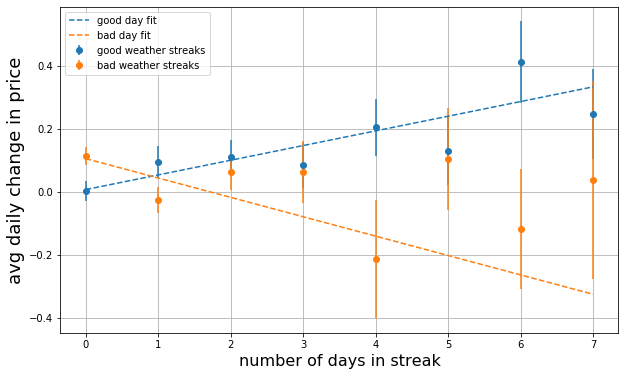

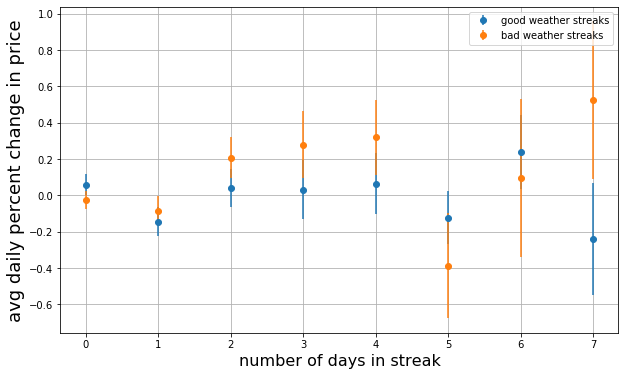

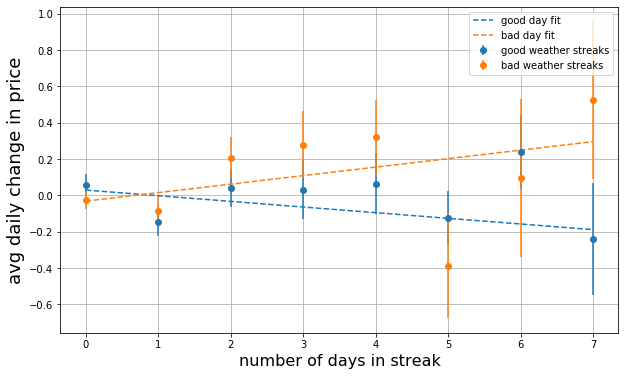

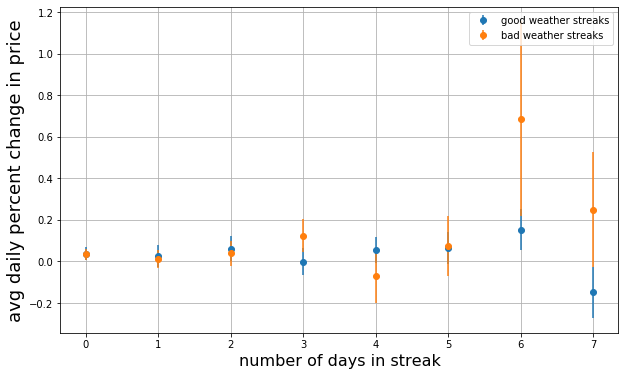

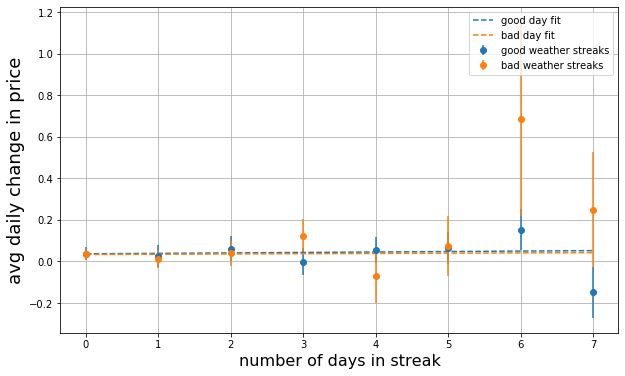

In [51]:
for start_year in range(1950,2020,10):
    end_year = start_year + 9
    print(start_year,end_year)
    measure_slope(df_all,start_year,end_year)